In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mpmath
import math
import warnings
warnings.filterwarnings('ignore')

Дискретные распределения
-----------------

Пусть счётное дискретное распределение задаётся вероятностями $p_k = \frac{k^n}{k!eB_n}$, где $B_n$ это n-ое число Белла (https://en.wikipedia.org/wiki/Bell_number).

In [2]:
def make_pdf(n):
    def pdf(k):
        numer = mpmath.power(k, n)
        denom = mpmath.factorial(k) * mpmath.e * mpmath.bell(n)
        return numer / denom
    return pdf
 
def find_interval(u, pdf): #Крайне неоптимизированный алгоритм. Какая у него средняя сложность?
    k = 1
    cdf = 0
    while True:
        cdf += pdf(k)
        if  u < cdf:
            return k
        k += 1
 
def simulate(pdf, n = 1):
    u = np.random.rand(n)
    return np.array([find_interval(u[k], pdf) for k in range(n)])

In [3]:
seed = 1
n_bell = 15
pdf_bell = make_pdf(n_bell)
Y = simulate(pdf_bell, 1000)

In [4]:
(np.mean(Y), np.var(Y))

(7.646, 2.6506839999999996)

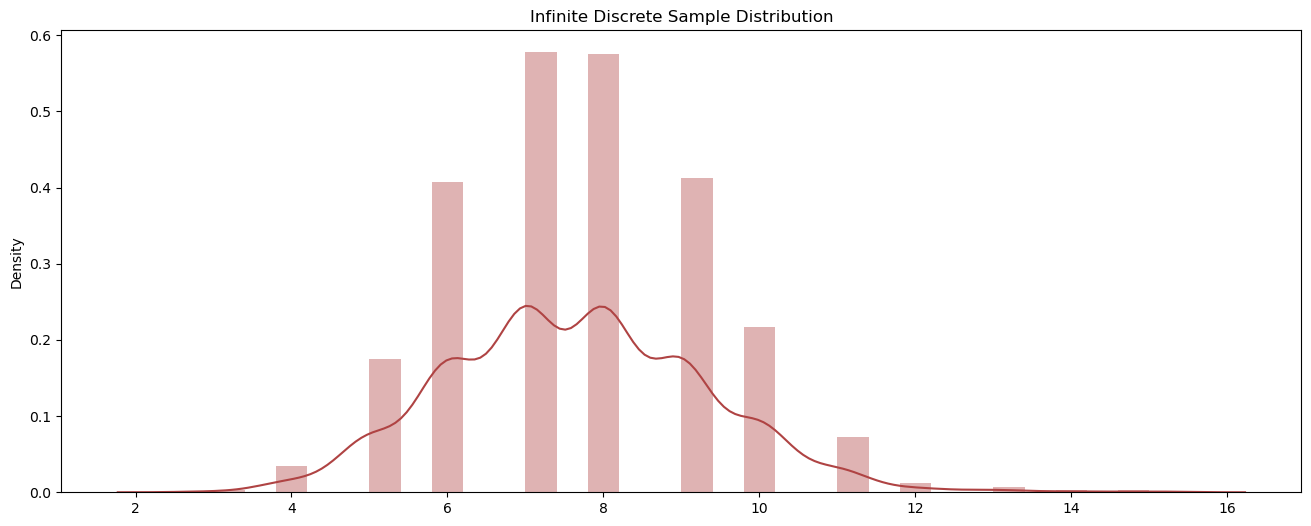

In [5]:
plt.figure(figsize=(16,6))
sns.distplot(Y,color="#AF4343")
plt.title("Infinite Discrete Sample Distribution")
plt.show()

Для дискретного распределения с конечным числом значений можно использовать ту же функцию

In [6]:
prob = [0, 0, 0.1, 0.1, 0.3, 0.3, 0.1, 0.1, 0, 0]

def make_finite_pdf(p):
    def finite_pdf(k):
        if k <= len(p):
            return p[k - 1]
        else:
            return 0.
    return finite_pdf

In [7]:
finite_pdf = make_finite_pdf(prob)

Y = simulate(finite_pdf, 1000)

In [8]:
(np.mean(Y), np.var(Y))

(5.479, 1.7795590000000001)

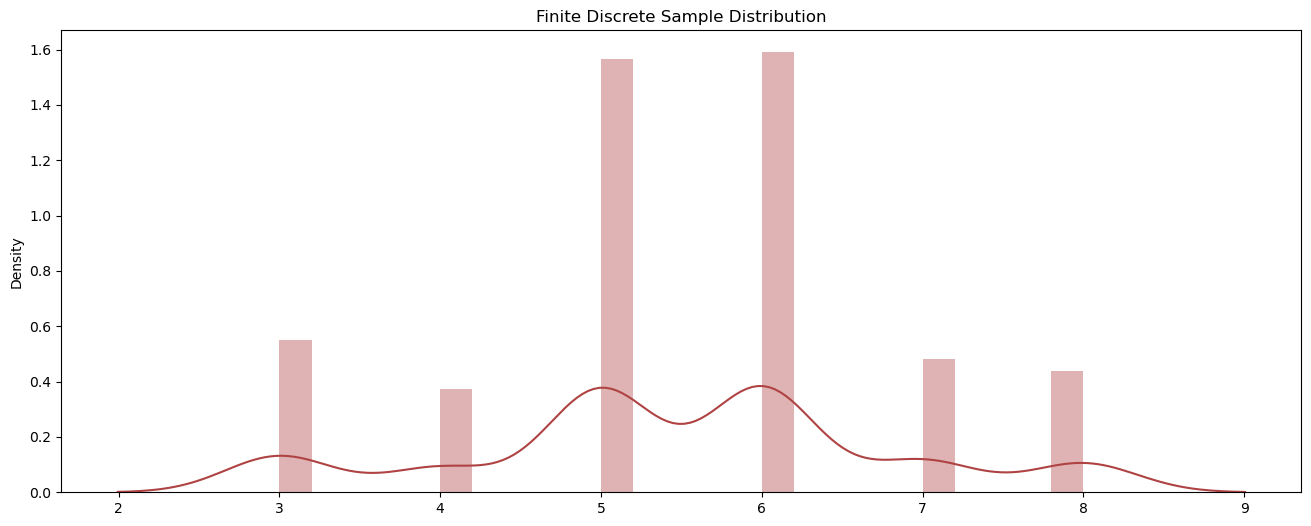

In [9]:
plt.figure(figsize=(16,6))
sns.distplot(Y,color="#AF4343")
plt.title("Finite Discrete Sample Distribution")
plt.show()

Непрерывные распределения
-

In [10]:
def rexp(a, n = 1):
    u = np.random.rand(n)
    a_inv = 1/a
    return np.array([-a_inv*np.log(u[k]) for k in range(n)])

In [11]:
Y = rexp(1, 10000)

In [12]:
(np.mean(Y), np.var(Y))

(1.0078875494429662, 1.0352730723224308)

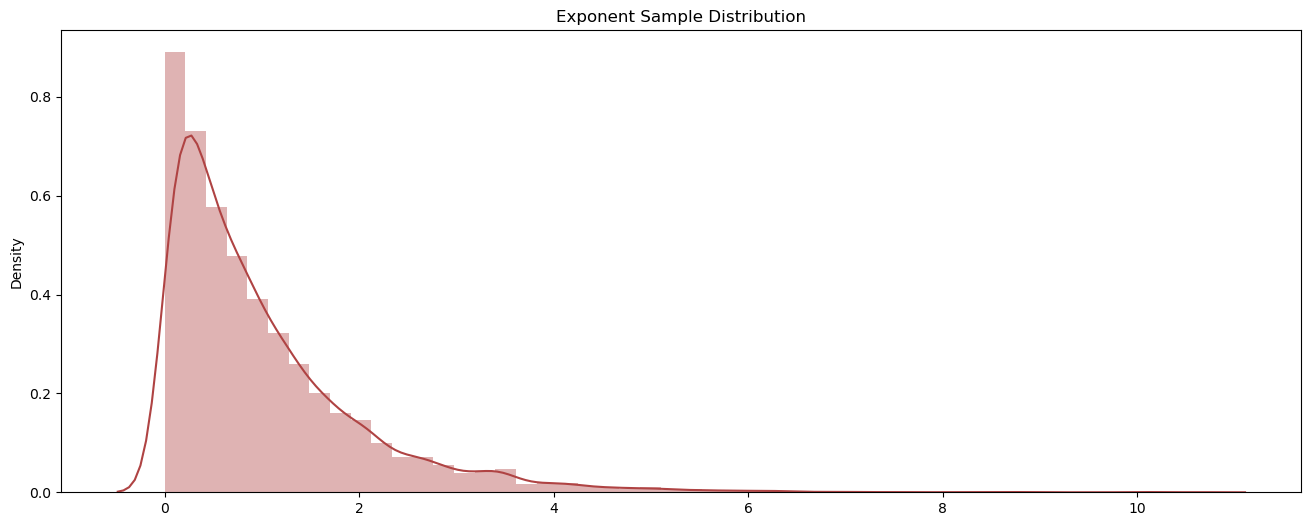

In [13]:
plt.figure(figsize=(16,6))
sns.distplot(Y,color="#AF4343")
plt.title("Exponent Sample Distribution")
plt.show()

In [14]:
def box_muller(n = 1):
    u1 = np.random.rand(math.ceil(n/2))
    u2 = np.random.rand(math.ceil(n/2))

    return np.concatenate(
        (np.array([np.sqrt(-2*np.log(u1[k]))*np.sin(2*np.pi*u2[k]) for k in range(math.ceil(n/2))]),
        np.array([np.sqrt(-2*np.log(u1[k]))*np.cos(2*np.pi*u2[k]) for k in range(math.ceil(n/2))]))
    )[:n]

In [15]:
Y = box_muller(10000)

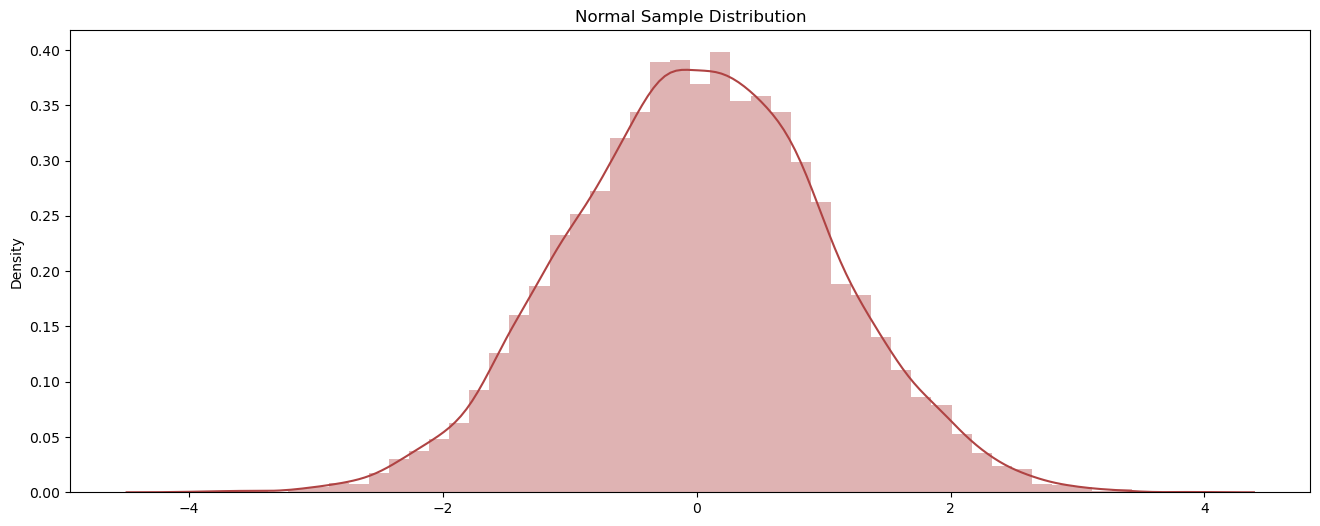

In [16]:
plt.figure(figsize=(16,6))
sns.distplot(Y,color="#AF4343")
plt.title("Normal Sample Distribution")
plt.show()